### 1. 주요함수
- pd.to_datetime()
- 통계 함수
  - df.cumsum(), df.cumprod()
- df.apply(function)
- df.corr() : 상관관계
- pd.merge()
- pd.contact()
- df.groupby()
- df.pivot_table()
- 

In [27]:
import seaborn as sns
df= sns.load_dataset('titanic')
df.head(2)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False


In [28]:
# 이상치(Outlier) - 연속형 Data

df['fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: fare, dtype: float64

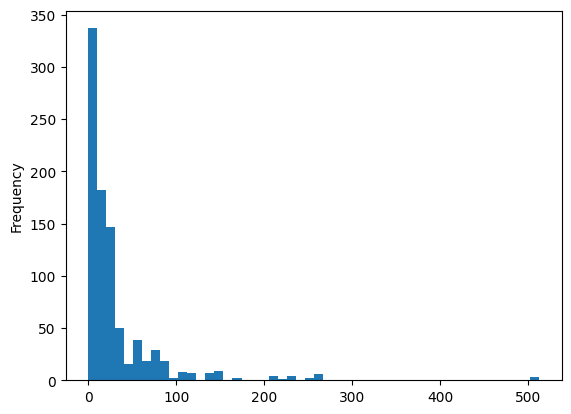

In [31]:
import matplotlib.pyplot as plt

# 아래처럼 정규 분포가 아닌 형태는 Machine Learning 학습 시 안 좋음
df['fare'].plot.hist(bins=50)
plt.show()

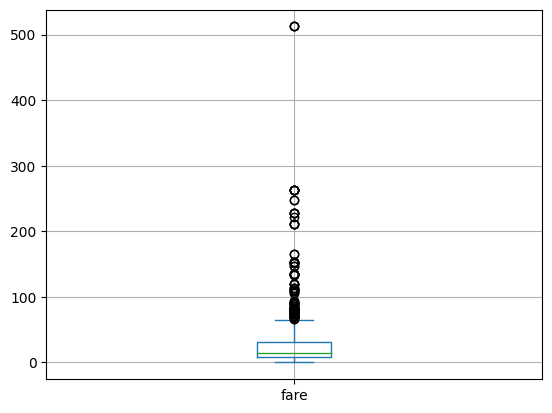

In [35]:
# box plot - 이상치를 시각적으로 확인
df['fare'].plot.box(grid=True)
plt.show()

In [40]:
# 이상치 구하기 (IQR)
Q1, Q3 = df['fare'].quantile([0.25,0.75])
IQR = Q3 - Q1
lower_f = Q1 - 1.5*IQR #value < lower_f
upper_f = Q3 + 1.5*IQR #value > upper_f
print(lower_f,upper_f)

-26.724 65.6344


In [42]:
# 이상치 구하기 (3* std)
std = df['age'].std()
mean = df['age'].mean()
lower_f = mean - 3*std
upper_f = mean + 3*std
print(lower_f, upper_f)

-13.880374349943303 73.27860964406094


In [43]:
# 누적 합
df['fare'].cumsum()

0          7.2500
1         78.5333
2         86.4583
3        139.5583
4        147.6083
          ...    
886    28602.7493
887    28632.7493
888    28656.1993
889    28686.1993
890    28693.9493
Name: fare, Length: 891, dtype: float64

In [46]:
# 누적 곱
df['age'].cumprod()

0            22.0
1           836.0
2         21736.0
3        760760.0
4      26626600.0
          ...    
886           inf
887           inf
888           NaN
889           inf
890           inf
Name: age, Length: 891, dtype: float64

In [47]:
# 상관 계수 (매우 중요)
# 두 변수의 선형성 정도
df.corr()

C:\Users\Admin\AppData\Local\Temp\ipykernel_3456\1277235667.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,survived,pclass,age,sibsp,parch,fare,adult_male,alone
survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,-0.557080,-0.203367
pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,0.094035,0.135207
age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,0.280328,0.198270
sibsp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,-0.253586,-0.584471
parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,-0.349943,-0.583398
fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,-0.182024,-0.271832
adult_male,-0.557080,0.094035,0.280328,-0.253586,-0.349943,-0.182024,1.000000,0.404744
alone,-0.203367,0.135207,0.198270,-0.584471,-0.583398,-0.271832,0.404744,1.000000


In [53]:
df2 = df[['survived', 'adult_male','alone','pclass']]
df2.corr()

# survived = 0,1 (사망, 생존)
# adult_male = 0, 1 (성인 남성 아님, 성인 남성임)

# -1, 1은 완전 상관 관계
# 절대값이 0.7보다 클 경우: 상당히 큰 관계가 있음
# 절대값이 0~0.1: 거의 상관 관계 없음(선형 관계 없음)

,survived,adult_male,alone,pclass
survived,1.000000,-0.557080,-0.203367,-0.338481
adult_male,-0.557080,1.000000,0.404744,0.094035
alone,-0.203367,0.404744,1.000000,0.135207
pclass,-0.338481,0.094035,0.135207,1.000000


### pd.to_datetime()  
- 교재 207p
- pandas.to_datetime(arg, ...format=None, ...)

In [57]:
date = pd.DataFrame({'year': [2020,2019,2019], 'month':[1,2,3],'day':[1,2,3]})
date

,year,month,day
0,2020,1,1
1,2019,2,2
2,2019,3,3


In [58]:
pd.to_datetime(date)

0   2020-01-01
1   2019-02-02
2   2019-03-03
dtype: datetime64[ns]

In [59]:
s = pd.Series(['2020-01-01', '2019-02-02', '2019-03-03'])
s

0    2020-01-01
1    2019-02-02
2    2019-03-03
dtype: object

In [63]:
#아래 두개는 같은 결과 출력
pd.to_datetime(s)
s.astype('datetime64')

0   2020-01-01
1   2019-02-02
2   2019-03-03
dtype: datetime64[ns]

In [70]:
s=pd.Series(['221017','221018','221019'])
print(s.astype('datetime64'),'\n')
# 이 경우 일/월/년도로 인식해서 의도 된대로 값이 저장이 안됨
# 그런데 pd.to_datetime의 경우 format을 줄 수 있음
pd.to_datetime(s, format='%y%m%d')


0   2017-10-22
1   2018-10-22
2   2019-10-22
dtype: datetime64[ns] 



0   2022-10-17
1   2022-10-18
2   2022-10-19
dtype: datetime64[ns]

In [76]:
# Series로 되있는거를 DataFrame으로 만들 수가 있음
# datetime 타입의 dt accessor를 사용해 정보를 추출할 수 있음

A = pd.to_datetime(s, format='%y%m%d')
date = pd.DataFrame()
date['year']=A.dt.year
date['month']=A.dt.month
date['day']=A.dt.day
date

,year,month,day
0,2022,10,17
1,2022,10,18
2,2022,10,19


### pd.merge(), pd.contact() - p226

pandas.concat(objs, *, axis=0, join='outer', ignore_index=False, keys=None, levels=None, names=None, verify_integrity=False, sort=False, copy=True)
- 여러개를 1개의 DataFrame으로 합치기(index 기준)
- axis=0: 컬럼명이 같을 때 사용
- axis=1: Index가 같을 때 사용


pandas.merge(left, right, how='inner', on=None, left_on=None, right_on=None, left_index=False, right_index=False, sort=False, suffixes=('_x', '_y'), copy=True, indicator=False, validate=None)

- 2개의 DataFrame을 1개로 병합
- left, right라는 2개의 DataFrame을 on(양쪽이 같은 열이름을 갖는 경우), left_on, right_on(다른 열이름일 경우)
- left_index, right_index는 True를 하면 index 기주능로 병합하는 것을 의미



In [77]:
df1 = pd.DataFrame({
    'K':['K0', 'K1', 'K2'],
    'X2':['A', 'B', 'A'],
    'X3':[1,2,3] })
df1

,K,X2,X3
0,K0,A,1
1,K1,B,2
2,K2,A,3


In [78]:
df2 = pd.DataFrame({
    'K':['K1', 'K2', 'K3'],
    'X3':[4, 5, 6],
    'X4':['B', 'A', 'B'] })
df2

,K,X3,X4
0,K1,4,B
1,K2,5,A
2,K3,6,B


In [79]:
pd.concat([df1,df2],axis=0)

,K,X2,X3,X4
0,K0,A,1,NaN
1,K1,B,2,NaN
2,K2,A,3,NaN
0,K1,NaN,4,B
1,K2,NaN,5,A
2,K3,NaN,6,B


In [80]:
pd.concat([df1,df2], axis=0, join='inner')

,K,X3
0,K0,1
1,K1,2
2,K2,3
0,K1,4
1,K2,5
2,K3,6


In [82]:
pd.concat([df1,df2], axis=1, join='outer')

,K,X2,X3,K,X3,X4
0,K0,A,1,K1,4,B
1,K1,B,2,K2,5,A
2,K2,A,3,K3,6,B


In [83]:
pd.merge(df1,df2, on='K', how='right')

,K,X2,X3_x,X3_y,X4
0,K1,B,2.0,4,B
1,K2,A,3.0,5,A
2,K3,NaN,NaN,6,B


### dropna()

In [ ]:
# 'A' 컬럼 삭제
df.drop(columns=['A']).head(3)

In [ ]:
# 0,3 Label을 갖는 행 삭제
df.drop([0,3, axis=0]).head(3)
df.drop(index=[0,3]).head(3)

### df.apply(function) - 교재 없음

DataFrame.apply(func, axis=0, raw=False, result_type=None, args=(), **kwargs)

- 함수를 적용
- 

In [84]:
import numpy as np
df = pd.DataFrame(np.arange(1, 10).reshape(3, -1), index=list("ABC"), columns=['X', 'Y', 'Z'])
df

,X,Y,Z
A,1,2,3
B,4,5,6
C,7,8,9


In [91]:
#여기서 function의 argument는 column 번호

df.apply(lambda x: print(x), axis=1)  

def function(s):
    return s['X'] if s['X']%2==0 else s['Y']

df.apply(function, axis=1)

X    1
Y    2
Z    3
Name: A, dtype: int32
X    4
Y    5
Z    6
Name: B, dtype: int32
X    7
Y    8
Z    9
Name: C, dtype: int32


A    2
B    4
C    8
dtype: int32

## 그룹 분석: 자료를 집단 별로 묶어서 계산
- df.groupby() : 데이터를 그룹 별로 분할(split)하고, 각 그룹 별로 집계 함수 적용(Apply) 후 결과를 하나로 합친(Combine) 결과 반환

데이터의 종류
- 연속형 - 키, 몸무게, 기온, 나이
- 범주형(이산형) - 혈액형(A,B,O,AB → 0,1,2,3), 올림픽 메달의 종류(금,은,동 → 0,1,2), 머신러닝 알고리즘!!!!

ex) 키 예측: 영향을 주는(유의미한) 변수(값) 선택

In [46]:
import pandas as pd
import numpy as np

df = pd.DataFrame({
    'A': list('AAABBBCCC'),
    'B': [3,1,0,1,7,3,2,1,3],
    'C': [1,2,5,6,2,3,4,1,2]
})
df

,A,B,C
0,A,3,1
1,A,1,2
2,A,0,5
3,B,1,6
4,B,7,2
5,B,3,3
6,C,2,4
7,C,1,1
8,C,3,2


In [47]:
# split: DataFrameGroupBy

df_temp = df.groupby(by='A')
for group_name, df_temp in df_temp:
    display(group_name, df_temp)

'A'

,A,B,C
0,A,3,1
1,A,1,2
2,A,0,5


'B'

,A,B,C
3,B,1,6
4,B,7,2
5,B,3,3


'C'

,A,B,C
6,C,2,4
7,C,1,1
8,C,3,2


In [49]:
df_temp.get_group('B')

AttributeError: 'DataFrame' object has no attribute 'get_group'

In [19]:
# 'A' 컬럼의 범주 별 평균 구하기
df.groupby(by='A').min()

,B,C
A,,
A,0,1
B,1,2
C,1,1


In [24]:
# 'A' 컬럼의 범주 별 'B' 컬럼의 합계 구하기 (Series)
display(df.groupby(by='A')['B'].sum())
# 'A' 컬럼의 범주 별 'B' 컬럼의 합계 구하기 (Series)
display(df.groupby(by='A')[['B']].sum())

A
A     4
B    11
C     6
Name: B, dtype: int64

,B
A,
A,4
B,11
C,6


In [22]:
#index-> columns로 가져올 때 reset_index() 활용
df.groupby(by='A')[['B']].sum().reset_index() 

,A,B
0,A,4
1,B,11
2,C,6


In [29]:
# 'A' 컬럼의 범주별 'B', 'C' 컬럼 평균 구하기 - 컬럼을 'B', 'C'로 제한

df.groupby(by='A')[['B','C']].mean().reset_index().round(3)

,A,B,C
0,A,1.333,2.667
1,B,3.667,3.667
2,C,2.000,2.333


In [31]:
#agg 사용
df.groupby(by='A').agg(['sum','mean'])

B             C          
  sum      mean sum      mean
A                            
A   4  1.333333   8  2.666667
B  11  3.666667  11  3.666667
C   6  2.000000   7  2.333333

In [33]:
df['D'] = list('XXYXYXXYX')
df

,A,B,C,D
0,A,3,1,X
1,A,1,2,X
2,A,0,5,Y
3,B,1,6,X
4,B,7,2,Y
5,B,3,3,X
6,C,2,4,X
7,C,1,1,Y
8,C,3,2,X


In [35]:
#Multi Level Indexing
df.groupby(by=['A','D']).sum().reset_index()

,A,D,B,C
0,A,X,4,3
1,A,Y,0,5
2,B,X,4,9
3,B,Y,7,2
4,C,X,5,6
5,C,Y,1,1


## Pivoting : Excel의 피봇 테이블 기능과 동일
- df.pivot_table(values, index, columns, aggfunc, fill_value)
  - values : 집계하려는 열의 Label 혹은 Label의 리스트
  - index : 피벗 테이블 행의 그룹으로 묶을 열의 Label이나 이름이나 그룹 키
  - columns : 피벗 테이블 열의 그룹으로 묶을 열의 Label이나 이름이나 그룹 키
  - aggfunc : 집계 함수, 함수 List, 기본값은 mean
  - fill_value : 누락된 값의 대체값

In [37]:
df

,A,B,C,D
0,A,3,1,X
1,A,1,2,X
2,A,0,5,Y
3,B,1,6,X
4,B,7,2,Y
5,B,3,3,X
6,C,2,4,X
7,C,1,1,Y
8,C,3,2,X


In [38]:
# 행(Index)는 'A'컬럼, 열(Column)는 'D'컬럼
df.pivot_table(index='A', columns='D', values=['B','D'], aggfunc='sum')

B     C   
D  X  Y  X  Y
A            
A  4  0  3  5
B  4  7  9  2
C  5  1  6  1

### 2. DataFrame 조작
- df.drop() : 지정된 행 또는 열이 삭제된 결과 반환
- df[컬럼명] = value
- df[컬럼명] = df['A'] + df['B']
- df.inesert(loc, 컬럼명, value)

### 3. Others
- pd.cut() : 연속 Data를 범주형 Data로 변경
- pd.date_range() : datetime64 타입의 데이터 생성

pd.cut(x, bins, right=True, labels=None, retbins=False, precision=3, include_lowest=False, duplicates='raise', ordered=True)
- 과대적합 방지 기법
- 이상치 문제 해결 기법

In [ ]:
# (0,15], (15,20], (25,40], .... , (75,100] : right=True
# [0,15), [15,20), [25,40), .... , [75,100) : right=False

In [51]:
ages = [0, 0,1, 15, 10, 21, 23, 37, 100, 99, 101] #연속 데이터
bins = [0, 15, 25, 40, 60, 100] # 범주
labels = '어린이 청소년 청년 장년 노년'.split()
cuts = pd.cut(ages, bins, right=True, labels=labels)
cuts

[NaN, NaN, '어린이', '어린이', '어린이', ..., '청소년', '청년', '노년', '노년', NaN]
Length: 11
Categories (5, object): ['어린이' < '청소년' < '청년' < '장년' < '노년']

In [52]:
ages = [0, 0,1, 15, 10, 21, 23, 37, 100, 99, 101] #연속 데이터
bins = [0, 15, 25, 40, 60, 100]
labels = '어린이 청소년 청년 장년 노년'.split()
cuts = pd.cut(ages, bins, right=False, labels=labels)
cuts

['어린이', '어린이', '어린이', '청소년', '어린이', ..., '청소년', '청년', NaN, '노년', NaN]
Length: 11
Categories (5, object): ['어린이' < '청소년' < '청년' < '장년' < '노년']

In [54]:
pd.date_range('20200101',periods=10, freq='D')

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08',
               '2020-01-09', '2020-01-10'],
              dtype='datetime64[ns]', freq='D')